In [152]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
#importing some other libraries
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

In [153]:
#getting the dataset
df=pd.read_csv("musk_csv.csv")

#getting the view of the data
df.head(100)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,MUSK-213,213_1+50,50,-199,-101,28,156,75,26,...,-117,-137,31,168,168,161,-68,-143,28,1
96,97,MUSK-213,213_1+51,40,87,-144,27,-117,72,56,...,-145,-155,37,2,142,177,-55,-135,101,1
97,98,MUSK-213,213_1+52,40,86,-144,27,-117,72,56,...,-145,-155,37,2,142,177,-55,-135,102,1
98,99,MUSK-213,213_1+53,50,-194,-145,24,232,4,57,...,-54,-7,38,147,163,169,-70,-153,21,1


In [154]:
#Some tailed output view of the data
df.tail(100)

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6498,6499,NON-MUSK-j84,j84_1+1,42,-198,-163,-96,-117,17,-159,...,-306,15,52,127,144,148,-60,-124,56,0
6499,6500,NON-MUSK-j84,j84_1+2,42,-198,-163,-84,-117,-43,-159,...,-78,17,53,127,144,148,-60,-124,56,0
6500,6501,NON-MUSK-j84,j84_1+3,42,-198,-160,-111,-117,-179,45,...,-316,-206,55,126,143,151,-60,-127,55,0
6501,6502,NON-MUSK-j84,j84_1+4,42,-198,-150,-112,-117,-179,67,...,-316,-206,55,126,143,151,-60,-127,56,0
6502,6503,NON-MUSK-j90,j90_1+1,109,58,-163,-80,-117,75,-162,...,-269,46,36,257,290,144,-58,-118,60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


#just checking if there is any null value in the dataset or not


In [131]:
#shape of the object
df.shape

(6598, 170)

In [155]:
#describing the data 
df.describe()


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [156]:
#checking the null values if it is there
df.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [157]:
#setting the predictors and the predicted values
x=df.iloc[:,3:-1].values
y=df.iloc[:,-1:].values
print(x.shape)
print(y.shape)

(6598, 166)
(6598, 1)


In [ ]:
#Extra Code if pca will be required

using PCA to analyse feature






In [ ]:
x_std=StandardScaler().fit_transform(x)
print(x_std.shape)

In [ ]:
mean_vec=np.mean(x_std,axis=0)
cov_mat=(x_std - mean_vec).T.dot((x_std - mean_vec))/(x_std.shape[0]-1)
print('Covariance Matrix')
print(cov_mat)

In [ ]:
eig_vals,eig_vecs=np.linalg.eig(cov_mat)
print('Eigenvectors\n%s'%eig_vecs)
print('Eigenvalues\n%s'%eig_vals)

In [ ]:
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,1]) for i in range(len(eig_vals))]
for i in eig_pairs:
  print(i[0])

In [ ]:
tot=sum(eig_vals)
var_exp =[(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
print(var_exp)

after cummlative sum of all eigen vals we come to know that the important features are lies between col[0] to col[70]

In [ ]:
cum_var_exp=np.cumsum(var_exp)
print(cum_var_exp)

In [158]:
#setting the train and test data
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.3,random_state=30)
X_train.shape

(4618, 166)

In [159]:
#setting the validation data
X_val,X_test,Y_val,Y_test =  train_test_split(X_test,Y_test,test_size=0.5,random_state=30)
X_val.shape

(990, 166)

In [160]:
X_test.shape

(990, 166)

In [161]:
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten,LeakyReLU

In [162]:
print(X_train)

[[  72 -199  -75 ...  -69 -153   13]
 [  43 -199 -119 ...  -67 -151   50]
 [  43 -147   32 ...  -66 -147   -8]
 ...
 [  20 -194 -142 ...  -59 -120   28]
 [  17 -198 -154 ...  -62 -248   83]
 [  44 -195 -141 ...  -73 -196   -2]]


In [163]:
model = Sequential()
model.add(Dense(512, input_dim=166, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128,  activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adadelta",metrics=["accuracy"])
print(model.summary())

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               85504     
_________________________________________________________________
dense_79 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_81 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 65        
Total params: 258,049
Trainable params: 258,049
Non-trainable params: 0
_________________________________________________________________
None


In [164]:
# Use Early-Stopping
callback_early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

# Train model
history=model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback_early_stopping])

# Predict test dataset
#x_test = df_test.drop(['id'], axis=1).values
y_test = model.predict(X_test)

# Output
#df_submit['target'] = y_test[:, 1]
#df_submit.to_csv('submission_output.csv', index=False)

Train on 4618 samples, validate on 990 samples
Epoch 1/100
4618/4618 [==============================] - 2s 335us/step - loss: 1.8569 - accuracy: 0.8657 - val_loss: 2.7692 - val_accuracy: 0.7000
Epoch 2/100
4618/4618 [==============================] - 1s 256us/step - loss: 0.4362 - accuracy: 0.9067 - val_loss: 0.1832 - val_accuracy: 0.9283
Epoch 3/100
4618/4618 [==============================] - 1s 238us/step - loss: 0.2355 - accuracy: 0.9270 - val_loss: 0.3217 - val_accuracy: 0.9374
Epoch 4/100
4618/4618 [==============================] - 1s 314us/step - loss: 0.1624 - accuracy: 0.9465 - val_loss: 0.2358 - val_accuracy: 0.9030
Epoch 5/100
4618/4618 [==============================] - 1s 220us/step - loss: 0.1471 - accuracy: 0.9547 - val_loss: 0.1276 - val_accuracy: 0.9596
Epoch 6/100
4618/4618 [==============================] - 2s 351us/step - loss: 0.1173 - accuracy: 0.9606 - val_loss: 0.0903 - val_accuracy: 0.9667
Epoch 7/100
4618/4618 [==============================] - 1s 317us/step 

In [165]:
model.save("my_model.hdf5")

In [166]:
!ls 

 musk_csv.csv   my_model   my_model.hdf5   task1.ipynb	'Untitled25 (1).ipynb'


In [167]:
#pred = model.fit(X_train,Y_train,batch_size=128,epochs=50,validation_data=(X_test,Y_test))
score=model.evaluate(X_test,Y_test,verbose=0)
print(score)

[0.05253886105151315, 0.9838383793830872]


In [168]:
print("f1 Score:",f1_score(Y_test,model.predict_classes(X_test)), "     Recall Score:",recall_score(Y_test,model.predict_classes(X_test)))
print()
print("Validation Loss:",score[0],"   Validation Accuracy:",score[1])

f1 Score: 0.9477124183006536      Recall Score: 0.9797297297297297

Validation Loss: 0.05253886105151315    Validation Accuracy: 0.9838383793830872


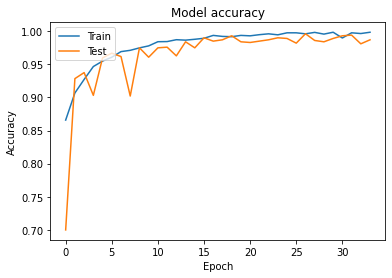

In [169]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

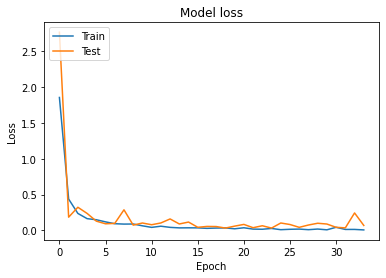

In [170]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()